# Синхронизация в коннектоме

## Моделирование узлов

В качестве модели узлов будем использовать модель стандартную модель Курамото. Сеть Курамото можно описать следующим образом:
$$\frac{d\phi_i}{dt} = \omega_i - \frac{\kappa}{N}\sum_{j=1}^{N}\sin(\phi_i - \phi_j), i = \overline{1, N} $$    


In [11]:
import sys

sys.path.append("..")
from connectom.node_model import Kuramoto
from connectom.utils import LoadConnectomData


In [12]:
data_path = os.path.join("../", "data")
import networkx as nx
import tensorflow as tf
import numpy as np
tf.debugging.disable_traceback_filtering()
#tf.config.set_visible_devices([], 'GPU')
loader = LoadConnectomData(data_path)
G = nx.read_graphml(loader(0))
adj_matr = nx.to_numpy_array(G)
kappa = 0.02
# self_freq = 1.0
self_freq = 1.0#tf.cast(tf.ones(len(adj_matr)), dtype=tf.float32)
# self_freq


## Запуск модели

In [13]:

import time
Kuramoto.data_type=tf.float32
kuramoto = Kuramoto(
    num_nodes=len(adj_matr), adjacency=adj_matr, kappa=kappa, self_freq=self_freq
)

num_nodes = len(adj_matr)
kuramoto.setup_integrator(step=0.01, num_steps=40000)
kuramoto.summary()
start = time.perf_counter()
res = kuramoto.run(tf.random.uniform((num_nodes,), dtype=tf.float32) * .1)
print(time.perf_counter() - start)


Kuramoto model has: 
--------------------------------------------------
Nodes parameters:
Number of node: 750
Number of edjes: 22355
Self frequencies: 1.0
--------------------------------------------------
Integration parameters:
Step: 0.009999999776482582
Number of steps: 40000
Run calculation...
You need to have  of memory without overhead 120.0MB
194.83228019997478


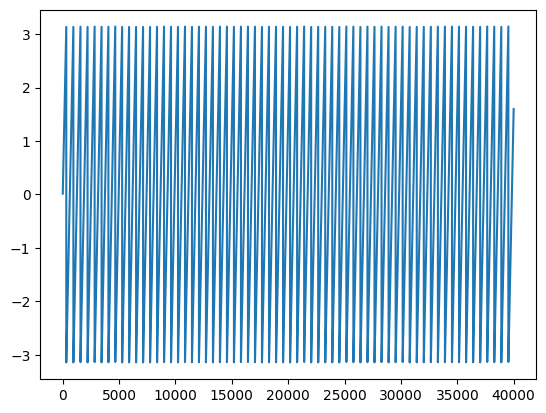

In [14]:
import matplotlib.pyplot as plt
plt.plot(res[7, :])

Text(0, 0.5, 'Node')

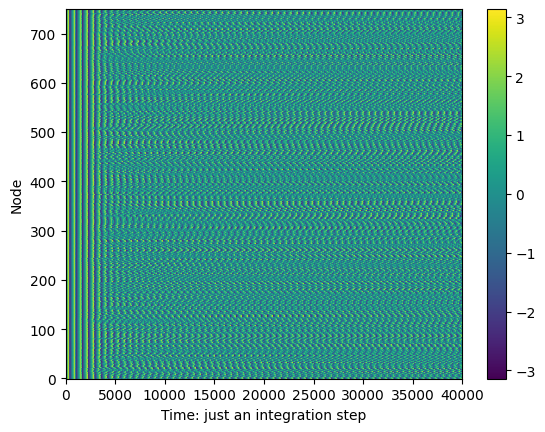

In [23]:
plt.imshow(res, aspect='auto', origin='lower')
plt.colorbar()
plt.xlabel('Time: just an integration step')
plt.ylabel('Node')

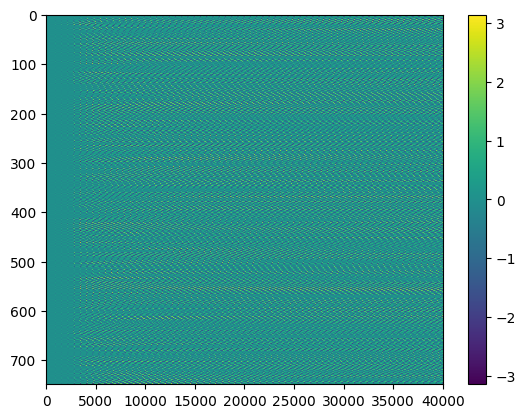

In [19]:
res_np = res.numpy()
res_np = np.diff(res_np, axis=0,)
plt.imshow(res_np, aspect='auto', vmin=-3.4)
plt.colorbar()

